In [28]:
import pandas as pd
import numpy as np
import scipy.stats as stats


In [29]:
import sys
sys.path.append("..")  
import metaprivBIDS_stat as ST
from metapriv_stat import plot_calc
from metapriv_stat import rst_outlier_case2

In [56]:
MULTI = 'https://s3.amazonaws.com/openneuro.org/ds004935/participants.tsv?versionId=pKNEG7Cn89OmcUDIq5B13qzn9x5Uizlf'
MULTI = pd.read_csv(MULTI, sep='\t')
WASI = 'https://s3.amazonaws.com/openneuro.org/ds004935/phenotype/WASI.tsv?versionId=FwdhWCxaUUiXmwoh6ELNocg3k84qoAjP'
WASI = pd.read_csv(WASI, sep='\t')
MULTI = MULTI.merge(WASI[['participant_id', 'WASI_score']], on='participant_id', how='left')
KSAD = 'https://s3.amazonaws.com/openneuro.org/ds004935/phenotype/KSADS.tsv?versionId=k4eJOEZkzDF2zpwsVFJgmS60AL6ObXVi'
KSAD = pd.read_csv(KSAD, sep='\t')
MULTI = MULTI.merge(KSAD, on='participant_id', how='left')


MULTI['income'] = MULTI['income'].replace(99, np.nan)
MULTI['race'] = MULTI['race'].replace('UNKNOWN', np.nan)


MULTI.to_csv('data_ds004935/MULTI_dataset_ds004935.csv', sep=',', index=False)

na_percentage = MULTI.isna().mean() * 100
na_percentage = na_percentage[na_percentage >= 10].sort_values(ascending=False)
na_percentage

income               21.818182
highest_education    19.545455
dtype: float64

In [57]:
suda = pd.read_csv('data_ds004935/suda_ds004935.csv', sep=',')
pif = pd.read_csv('data_ds004935/pif_ds004935.csv', sep=',',index_col='Unnamed: 0').sort_index()
suda_field_score =  pd.read_csv('data_ds004935/att_suda.csv', sep=',').drop(columns=['Unnamed: 0'], errors='ignore')
k_combined_field =  pd.read_csv('data_ds004935/normalized_difference_results.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})
k_combined_all = pd.read_csv('data_ds004935/k-combined-3-6.csv', sep=',')
k_combined_field_non_risk = pd.read_csv('data_ds004935/normalized_difference_results_non.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})


        ROW LEVEL CORRELATION      

Spearman Rank Correlation between suda & pif: 0.80, P-value: 0.0000
Kendall's Tau between suda & pif: 0.67, p-value: 0.0000


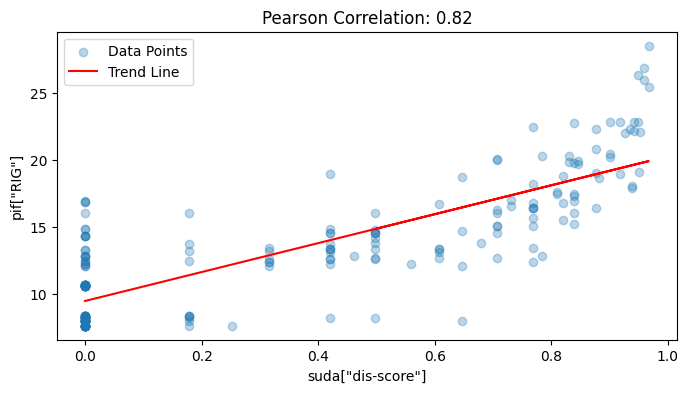

____________________________________________________________________________________

      FIELD LEVEL CORRELATIONS     

Pearson Correlation between SUDA & PIF field level: 0.74
Pearson Correlation between K-combined & PIF field level: 0.73
Pearson Correlation between SUDA & K-combined field level: 0.32


Spearman Rank Correlation between PIF & SUDA: 0.77, P-value: 0.0724
Spearman Rank Correlation between PIF & K: 0.17, P-value: 0.7489
Spearman Rank Correlation between SUDA & K: 0.51, P-value: 0.3046


In [32]:
ST.stats(suda, pif, suda_field_score, k_combined_field)

# SUM 

In [6]:
sum_score_df  = ST.calculate_summed_dis_scores(k_combined_all, MULTI, sample_fraction=0.3, missing_value= np.nan)

Spearman Correlation between Suda sum and K-combined: 0.66
Pearson correlation to Suda sum & K-combined 0.33052502863053923
________________________________________________________________________
Pearson Correlation: 0.33052502863053923


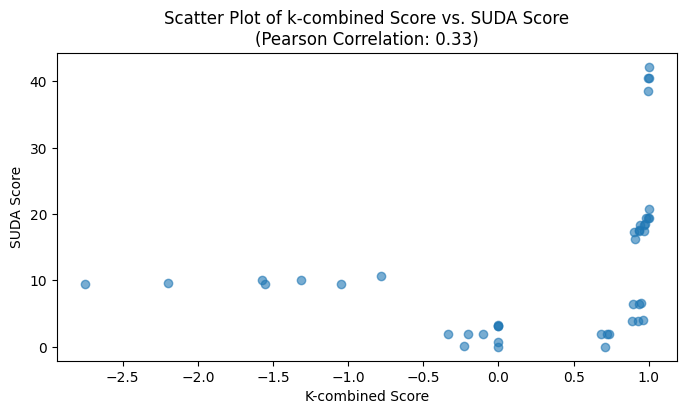

________________________________________________________________________


Spearman Correlation between PIF 95% and K-combined: 0.87
Pearson correlation to PIF 95% & K-combined 0.7030399748132201


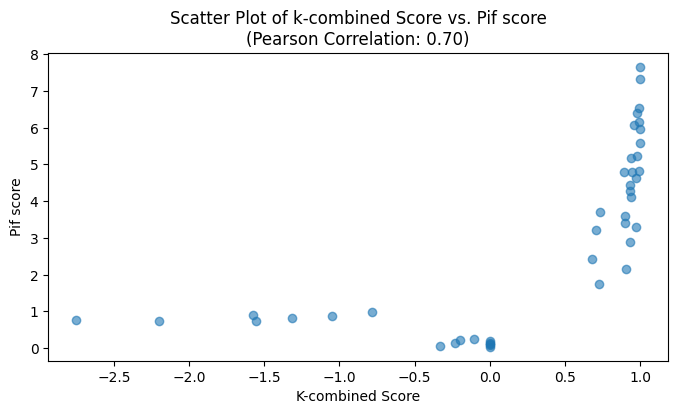

________________________________________________________________________


Spearman Correlation between PIF 95% and SUDA: 0.75
Pearson correlation to PIF 95% & SUDA 0.6822561035528255


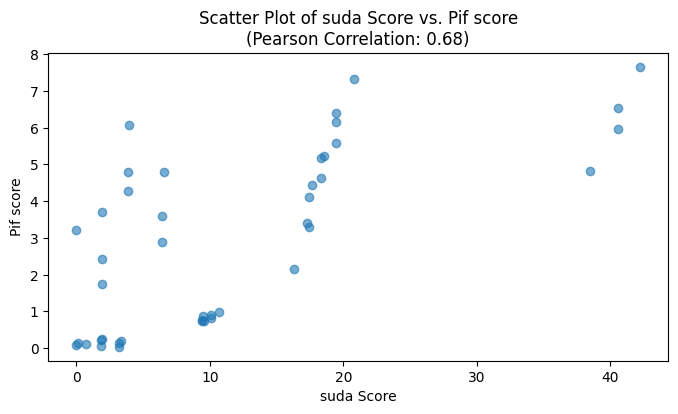

In [7]:
plot_calc(sum_score_df)

# T-test between risky and non-risky k-global values for variables. 


### Non risk variables

In [20]:
k_combined_field_non_risk

,variable,Normalized Difference
0,Flanker,6.0
1,K_SADS_PL_ADHD,3.5
2,SST,3.0
3,AXCPT,2.5
4,fmri_data,2.0
5,AS,1.5
6,K_SADS_PL_ODD,1.5
7,WASI_score,1.5
8,K_SADS_PL_GAD,1.0
9,K_SADS_PL_MANIA,0.0


# Risk Variables

In [21]:
k_combined_field

,variable,Normalized Difference
0,age,0.6
1,highest_education,0.0
2,ethnicity,0.0
3,race,0.0
4,sex,0.0
5,income,-0.4


In [24]:
mean_risk_values = (k_combined_field['Normalized Difference']).mean()
print('Mean, risk identifiers:',mean_risk_values)

mean_risk_values = (k_combined_field_non_risk['Normalized Difference']).mean()
print('Mean, non-risk identifiers:',mean_risk_values)

t, p = stats.ttest_ind(k_combined_field['Normalized Difference'], k_combined_field_non_risk['Normalized Difference'])
print('t:',t,'p-value:', p)

Mean, risk identifiers: 0.033333333333333326
Mean, non-risk identifiers: 0.6617647058823529
t: -1.1212956906448799 p-value: 0.26919812321860953


In [58]:
class_outliers, madn, mad, outlier_indices, above_outlier_indices = ST.rst_outlier_case2(suda, 'dis-score')
print(len(above_outlier_indices))
print(above_outlier_indices)

class_outliers, madn, mad, outlier_indices, above_outlier_indices = rst_outlier_case2(pif, 'RIG')
print(len(above_outlier_indices))

print(above_outlier_indices)


41
[3, 8, 10, 11, 16, 17, 19, 31, 32, 36, 37, 41, 47, 52, 60, 63, 73, 82, 93, 101, 106, 107, 108, 117, 123, 128, 130, 134, 139, 145, 150, 156, 165, 166, 168, 171, 177, 191, 207, 211, 218]
2
[36, 150]


In [62]:
MULTI.loc[36]

participant_id                    sub-23629
age                                   9.877
sex                                       F
race                         MULTIPLE RACES
ethnicity                                 1
highest_education                       3.0
income                                  3.0
clinical_scores                           1
behavioral_data                           1
fmri_data                                 1
AXCPT                                     1
AS                                        0
SST                                       0
Flanker                                   0
WASI_score                            108.0
K_SADS_PL_MDD                             0
K_SADS_PL_MANIA                           0
K_SADS_PL_HYPOMANIA                       0
K_SADS_PL_PSYCHOSIS                       0
K_SADS_PL_PANIC_DISORDER                  0
K_SADS_PL_SAD                             1
K_SADS_PL_AVOID_DISORDER                  1
K_SADS_PL_AGORAPHOBIA           